# HW4

## Problem 1
In ideal, good stepsize means that $\theta$ could converge to $\theta^*$ in finite step. If stepsize it is too small, it converge slowly. If it is too big, it may lead to instability or failure to converge.

I don't think there is a fixed good stepsize for a model. We can increase or decrease during the training by some experiencce and observe the converge speed.

## Problem 2

## 1
$f(\theta x + (1-\theta)y) = ||\theta x + (1-\theta)y -b||_2 \\$
$=||\theta(x-b)+(1-\theta)(y-b)||_2 \\$
$\leq \theta||(x-b)||_2 + (1-\theta)||(y-b)||_2 \\$
$=\theta f(x) + (1-\theta) f(y) \\$
So, this function is strictly convex.

In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
def f(x,b):
    return np.sqrt(((x-b)**2).sum())

def df(x,b):
    return 2*(x-b)/f(x,b)

def error(xk,x_star):
    return np.sqrt((((xk-x_star)**2).sum())/(xk**2).sum())

def r2(i):
    return 1
def r3(i):
    return (5/6)**i
def r4(i):
    return 1/(i+1)

## $f(x) = ||x-b||_2$

In [199]:
def error_plot(r,grad,max_iter=50,x0=np.array([0,0]),b=np.array([4.5,6]),title='',label=''):
    errors = []
    converge_idx = []
    x_star = b
    x = x0

    for i in range(max_iter):
        x = x - r(i)*grad(x,b)
        tmp = error(x,x_star)
        errors.append(tmp)
        if tmp < 1e-2:
            converge_idx.append(i)
        else:
            converge_idx = []

    line, = plt.plot(errors,label=label)
    line_color = line.get_color()

    if len(converge_idx) >= 5 :
        print(label,",\tconverge at: ",converge_idx[0])
        plt.annotate('{}'.format(converge_idx[0]), 
                xy=(converge_idx[0], errors[converge_idx[0]]), 
                xytext=(converge_idx[0], errors[converge_idx[0]] + 0.5),
                arrowprops=dict(facecolor=line_color, shrink=0.01))        
    elif converge_idx == []:
        print(label,":\t\tNot converge")

    plt.title(title)
    plt.xlabel('k: number of steps')
    plt.ylabel('Error $||x^*-x^k||_2/||x^*||_2$')
    plt.legend()

Stepsize = 1 :		Not converge
Stepsize = (5/6)^k ,	converge at:  18
Stepsize = 1/(k+1) ,	converge at:  22


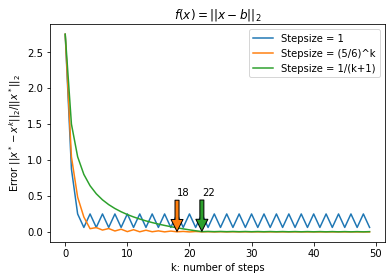

In [200]:
title = "$f(x)=||x-b||_2$"
error_plot(r2,grad=df,label = "Stepsize = 1",title=title)
error_plot(r3,grad=df,label = "Stepsize = (5/6)^k",title=title)
error_plot(r4,grad=df,label = "Stepsize = 1/(k+1)",title=title)


## $g(x) = ||x-b||_2^2$

In [201]:
def g(x,b):
    return ((x-b)**2).sum()

def dg(x,b):
    return 2*(x-b)

def r5(i):
    return 0.1
def r6(i):
    return (1/6)**i
def r7(i):
    return 1/(4*(i+1))

Stepsize = 0.1 ,	converge at:  20
Stepsize = (1/6)^k :		Not converge

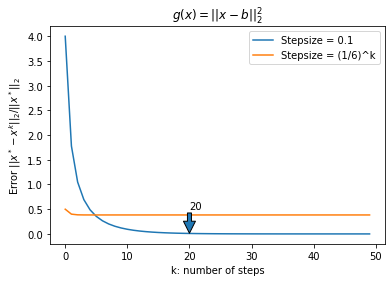

In [202]:
title = "$g(x)=||x-b||_2^2$"
error_plot(r5,max_iter = 50,grad=dg,label = "Stepsize = 0.1",title=title)
error_plot(r6,max_iter = 50,grad=dg,label = "Stepsize = (1/6)^k",title=title)

stepsize= 1/(4*(i+1) ,	converge at:  3246


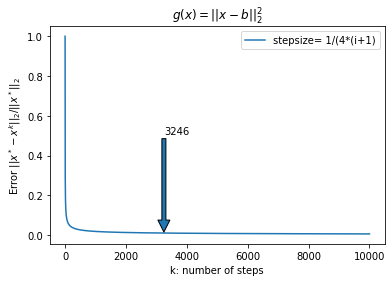

In [203]:
error_plot(r7,max_iter = 10000,grad=dg,label = "stepsize= 1/(4*(i+1)",title=title)